# 🕸️ Neural Networks Basics

## **Concepts**

## 1. Multi-Layer Perceptron (MLP)

- **Definition & Structure**
    
    An MLP consists of **fully connected (dense) layers**, comprised of:
    
    - An **input layer** (one neuron per input feature),
    - One or more **hidden layers** (process intermediate transformations),
    - An **output layer** (one neuron per output/class).
- **Purpose**
    
    MLPs are designed to learn **complex relationships** between inputs and outputs, thanks to their layered depth and non-linear transformations.
    

---

## 1.1. Components of an MLP

1. **Input Layer**
    
    Each neuron corresponds to an input feature in the dataset.
    
    *Example:* 3 input features → 3 input neurons.
    
2. **Hidden Layers**
    
    Any number of layers, each with multiple neurons, that progressively process information from the input. Their depth and width define the model’s capacity.
    
3. **Output Layer**
    
    Produces final predictions. For multi-class scenarios, the number of neurons matches the number of classes (final prediction has multiple outputs).
    
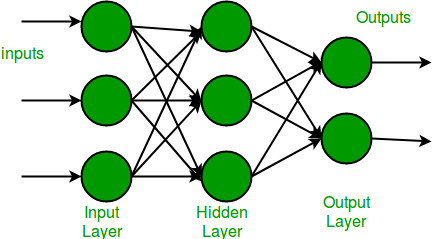

The interconnected nature of an MLP means that every node in one layer connects to every node in the next layer. As data flows through the network, each layer transforms it until the final output is produced in the output layer. 

---

## 1.2. How MLP Works

### A. Forward Propagation

Input→Linear Transform→Non-linearity (Activation)→Next Layer

- Linear Transform: Each neuron computes a **weighted sum** plus bias:
    
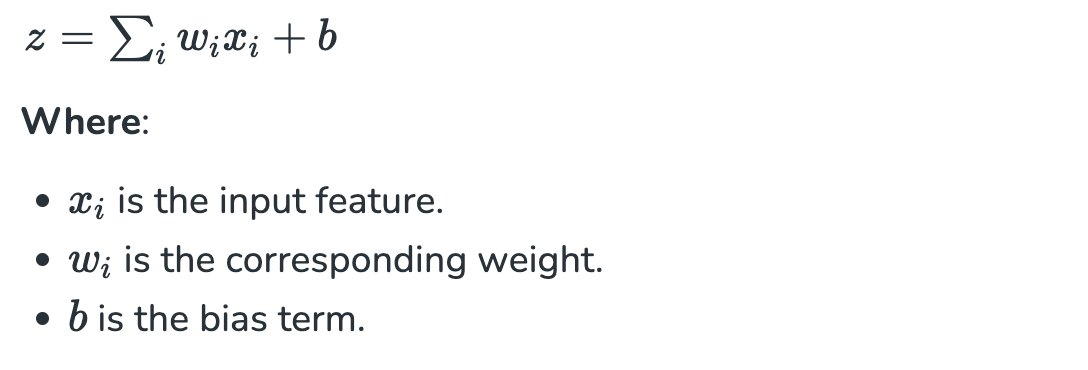
    
- Non-linearity: An **activation function** (e.g., Sigmoid, ReLU, Tanh) is applied to the weighted sum z to introduce non-linearity.

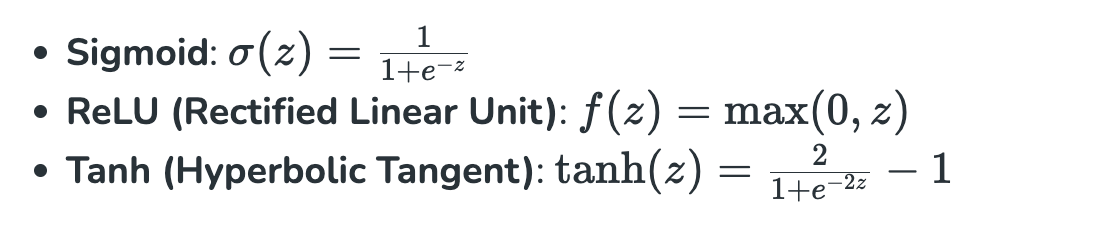

### B. Loss Function

- **Classification tasks:** Binary Cross-Entropy (for binary), or Sparse Categorical Cross-Entropy (for multi-class).

For binary class:
  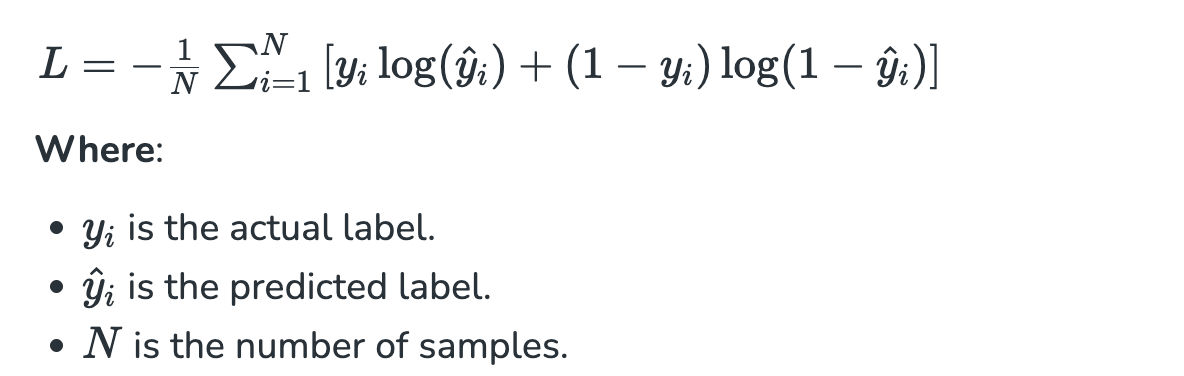

For multi-class:
  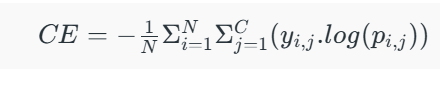
  
- **Regression tasks:** Mean Squared Error (MSE).

  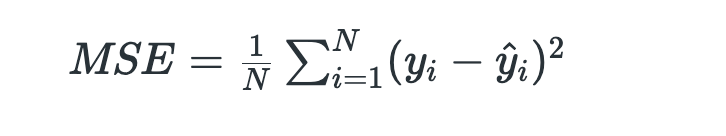

### C. Backpropagation

The objective of training a multi-layer perceptron (MLP) is to minimize the loss function by modifying the network’s weights and biases. This process is accomplished through backpropagation.

- **Backpropagation** computes gradients of the loss dunction w.r.t. each parameter (weight/bias) using the chain rule of calculus.
- **Gradient descent** updates parameters in the direction that reduces loss:
  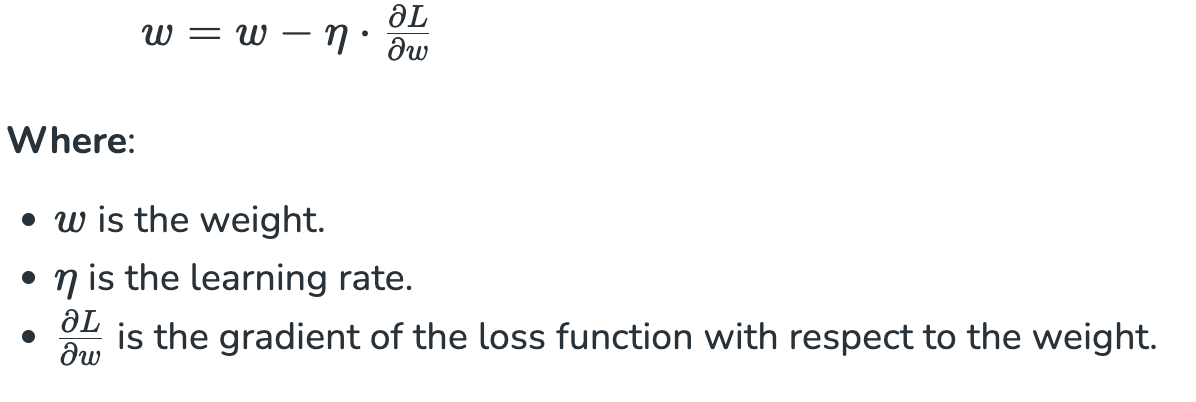
    

### D. Optimization

- **Stochastic Gradient Descent (SGD):** Updates based on small batches or individual samples.

  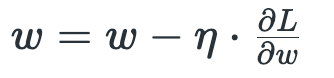
  
- **Adam Optimizer:** Enhances SGD with momentum and adaptive learning rates via internal calculations using gradients (moment estimates).

  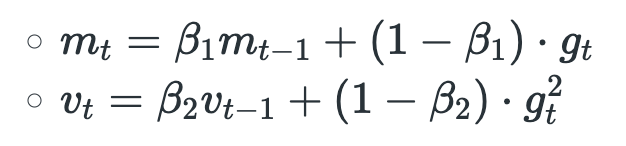

---

## 1.3. Advantages & Disadvantages of MLPs

**Advantages:**

- **Versatility:** Can handle both classification and regression tasks.
- **Non-linearity:** Activation functions enable modeling complex patterns.
- **Parallel Computation:** GPU support allows efficient training of MLPs

**Disadvantages:**

- **Computationally Expensive:** Large networks or datasets increase training time significantly.
- **Overfitting Risk:** Without regularization, MLPs may closely fit training data but generalize poorly.
- **Sensitivity to Scaling:** Input data needs proper normalization for stable training

---

## 1.4. Implementing MLP in TensorFlow
### Step-by-Step Walkthrough:

In [1]:
#1. **Import Modules & Load Dataset**
    
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Use TensorFlow, NumPy, and Matplotlib, plus the MNIST dataset for handwritten digits

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


**Short explanation:**

- **Imports necessary libraries**:
    - `tensorflow` for building and training neural networks.
    - `numpy` for numerical operations.
    - `matplotlib.pyplot` for plotting images and graphs.
    - `Sequential`, `Flatten`, `Dense` from Keras for creating feedforward neural networks.
- **Loads the MNIST dataset**:
- `x_train`, `x_test`: image data (28×28 grayscale images).
- `y_train`, `y_test`: labels (digits 0–9).

✅ **Purpose:** Prepare **libraries and dataset** for building and training a neural network on handwritten digits.

In [2]:
### 2. **Normalize Data**
### Scale pixel values from [0, 255] to [0, 1] for faster convergence:
    
gray_scale = 255

x_train = x_train.astype('float32') / gray_scale
x_test = x_test.astype('float32') / gray_scale

print("Feature matrix (x_train):", x_train.shape)
print("Target matrix (y_train):", y_train.shape)
print("Feature matrix (x_test):", x_test.shape)
print("Target matrix (y_test):", y_test.shape)

Feature matrix (x_train): (60000, 28, 28)
Target matrix (y_train): (60000,)
Feature matrix (x_test): (10000, 28, 28)
Target matrix (y_test): (10000,)


**Short explanation:**

- **Normalizes pixel values** from `[0, 255]` to `[0, 1]` by dividing by `255`.
- Converts arrays to `float32` for proper TensorFlow computation.
- Prints shapes of **training and test features (`x_train`, `x_test`)** and **labels (`y_train`, `y_test`)** to verify dataset dimensions.

✅ **Purpose:** Preprocess data for **faster, stable neural network training** and check input/output shapes.

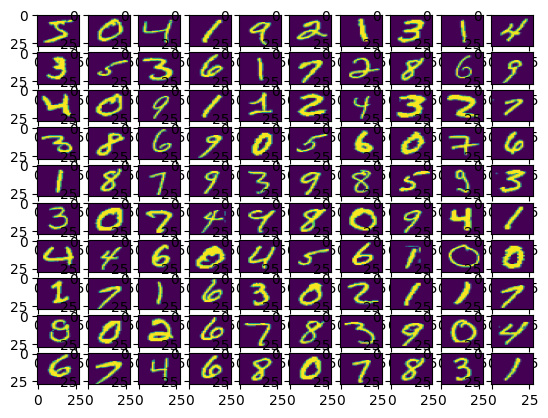

In [10]:
# 3. **Visualize Sample Data**
#Plot the first 100 images to get an intuition of the dataset.

fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k].reshape(28, 28), aspect='auto')
        k += 1
plt.show()

**Short explanation:**

- Plots the **first 100 images** from the training set to visualize the data.
- `fig, ax = plt.subplots(10, 10)`: creates a 10×10 grid of subplots.
- Loops through **10 rows × 10 columns**, showing each image using `imshow`.
- `x_train[k].reshape(28, 28)`: reshapes each image to 28×28 pixels.
- `plt.show()`: displays the grid of images.

✅ **Purpose:** Gain **intuition about the dataset** and see handwritten digit samples before training.

In [23]:
# 4. **Build the Sequential Model**:
# ------------------------------
# Model WITH Activation Functions
# ------------------------------
from tensorflow.keras import Input

model = Sequential([
    Input(shape=(28,28)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax') # output
])

**Short explanation:**

- Builds a **Sequential model with activation functions**.
- `Input(shape=(28,28))`: specifies input shape for MNIST images.
- `Flatten()`: converts 28x28 images to 784-dimensional vector.
- `Dense(128, activation='relu')`: hidden layer with 128 neurons and ReLU activation.
- `Dense(10, activation='softmax')`: output layer with 10 neurons and softmax for multi-class classification.

✅ **Purpose:** Define an MLP that can **learn non-linear patterns** and output **probabilities for each digit class**.

- *Flatten*: transforms 28×28 images into 784-length vectors.
- *Dense layers*: first two with 256 and 128 neurons (sigmoid), final with 10 neurons (softmax for classification)
- *Output Layer*: The final layer with 10 neurons representing the 10 classes of digits (0-9) with sigmoid activation.

In [6]:
# 5. **Compile the Model**:
    
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Short explanation:**

- Compiles the model before training.
- **Optimizer**: `adam` → adaptive learning rate for faster, stable convergence.
- **Loss**: `sparse_categorical_crossentropy` → suitable for multi-class classification with integer labels.
- **Metrics**: `accuracy` → track accuracy during training and evaluation.

✅ **Purpose:** Prepares the model for training by specifying **how it updates weights, measures error, and tracks performance**.

- **Optimizer**: Adam
- **Loss function**: Sparse Categorical Cross-Entropy
- **Metric**: Accuracy

In [7]:
# 6. **Train the Model**:
    
mod = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=2000,
    validation_split=0.2
)
mod

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6871 - loss: 1.2594 - val_accuracy: 0.8604 - val_loss: 0.5770
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8733 - loss: 0.4726 - val_accuracy: 0.9038 - val_loss: 0.3580
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9043 - loss: 0.3469 - val_accuracy: 0.9158 - val_loss: 0.2998
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9180 - loss: 0.2987 - val_accuracy: 0.9244 - val_loss: 0.2700
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9268 - loss: 0.2672 - val_accuracy: 0.9323 - val_loss: 0.2466
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9331 - loss: 0.2435 - val_accuracy: 0.9383 - val_loss: 0.2273
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9386 - loss: 0.2239 - val_accuracy: 0.9412 - val_loss: 0.2126
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9441 - loss: 0.2065 - val_accuracy: 0.9452 - val_loss

Uses 20% of the training set for validation to monitor generalization.

**Short explanation:**

- Trains the model **with activation functions** on the training data.
- `epochs=10`: model goes through the dataset 10 times.
- `batch_size=2000`: processes 2000 samples per update.
- `validation_split=0.2`: 20% of training data used for validation.
- Returns a **history object (`mod`)** containing training and validation **loss and accuracy** per epoch.

✅ **Purpose:** Store training progress to later **evaluate performance** or **plot accuracy/loss curves**.

In [11]:
# 7. **Evaluate Performance**:
    
results_with_activation = model.evaluate(x_test, y_test, verbose=0)
print('Test loss WITH activation, Test accuracy WITH activation:', results_with_activation)

Test loss WITH activation, Test accuracy WITH activation: [0.1776183545589447, 0.949400007724762]


Resulting in approx. **94.94% accuracy** on test data.

**Short explanation:**

- Evaluates the model **with activation functions** on the test set.
- `model.evaluate(x_test, y_test, verbose=0)` returns **test loss and accuracy**.
- Prints the results: **“Test loss WITH activation, Test accuracy WITH activation”**.

✅ **Purpose:** Compare the **performance of the model with activation** versus the model without activation on unseen data.

In [13]:
# ------------------------------
# Model WITHOUT Activation Functions
# ------------------------------
model_no_act = Sequential([
    Input(shape=(28,28)),
    Flatten(),
    Dense(128),          # No ReLU
    Dense(10)            # No Softmax
])

# Using 'from_logits=True' since last layer has no softmax
model_no_act.compile(optimizer='adam',
                     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                     metrics=['accuracy'])

mod_no_act = model_no_act.fit(
    x_train, y_train,
    epochs=10,
    batch_size=2000,
    validation_split=0.2
)

results_no_activation = model_no_act.evaluate(x_test, y_test, verbose=0)
print('Test loss WITHOUT activation, Test accuracy WITHOUT activation:', results_no_activation)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7094 - loss: 1.0473 - val_accuracy: 0.8684 - val_loss: 0.4941
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8766 - loss: 0.4471 - val_accuracy: 0.8992 - val_loss: 0.3654
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8985 - loss: 0.3663 - val_accuracy: 0.9080 - val_loss: 0.3261
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9076 - loss: 0.3320 - val_accuracy: 0.9162 - val_loss: 0.3051
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9128 - loss: 0.3134 - val_accuracy: 0.9185 - val_loss: 0.2935
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9163 - loss: 0.3003 - val_accuracy: 0.9194 - val_loss: 0.2850
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9190 - loss: 0.2908 - val_accuracy: 0.9214 - val_loss: 0.2814
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9211 - loss: 0.2837 - val_accuracy: 0.9244 - val_loss:

**Short explanation:**

- Builds a **model without activation functions**:
    - Flatten → Dense(128) → Dense(10) (**no ReLU, no Softmax**).
- Compiles with:
    - **Adam optimizer**
    - `SparseCategoricalCrossentropy(from_logits=True)` since output layer has no softmax.
    - Accuracy metric.
- Trains for **10 epochs**, batch size 2000, using 20% of training data for validation.
- Evaluates on test set and prints **test loss and accuracy**.

✅ **Purpose:** Compare performance of an MLP **with vs without activation functions** to see how activations affect learning and accuracy.

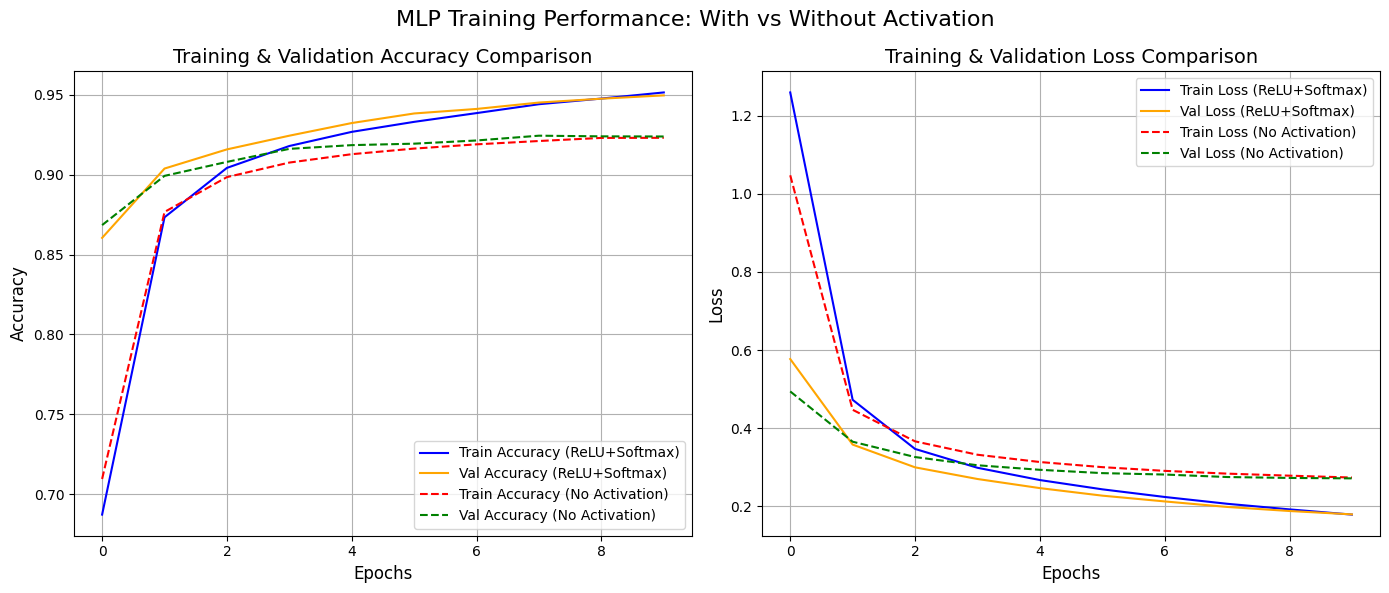

In [15]:
# ------------------------------
# Visualize Training vs. Validation (WITH & WITHOUT Activation)
# ------------------------------
plt.figure(figsize=(14, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(mod.history['accuracy'], label='Train Accuracy (ReLU+Softmax)', color='blue')
plt.plot(mod.history['val_accuracy'], label='Val Accuracy (ReLU+Softmax)', color='orange')
plt.plot(mod_no_act.history['accuracy'], label='Train Accuracy (No Activation)', color='red', linestyle='--')
plt.plot(mod_no_act.history['val_accuracy'], label='Val Accuracy (No Activation)', color='green', linestyle='--')
plt.title('Training & Validation Accuracy Comparison', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(mod.history['loss'], label='Train Loss (ReLU+Softmax)', color='blue')
plt.plot(mod.history['val_loss'], label='Val Loss (ReLU+Softmax)', color='orange')
plt.plot(mod_no_act.history['loss'], label='Train Loss (No Activation)', color='red', linestyle='--')
plt.plot(mod_no_act.history['val_loss'], label='Val Loss (No Activation)', color='green', linestyle='--')
plt.title('Training & Validation Loss Comparison', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

plt.suptitle("MLP Training Performance: With vs Without Activation", fontsize=16)
plt.tight_layout()
plt.show()

**Short explanation:**

- Creates a figure to compare **training and validation performance** of two models:
    - `mod`: with **ReLU + Softmax activation**
    - `mod_no_act`: **without activation**
- **Accuracy subplot**:
    - Solid lines: `mod` train/val accuracy
    - Dashed lines: `mod_no_act` train/val accuracy
- **Loss subplot**:
    - Solid lines: `mod` train/val loss
    - Dashed lines: `mod_no_act` train/val loss
- Adds **titles, axis labels, legend, grid**, and **overall figure title**.
- `plt.tight_layout()` adjusts spacing, `plt.show()` displays the plots.

✅ **Purpose:** Visually compare how **activation functions impact training and validation performance** in MLPs.

- Plot accuracy and loss over epochs for both training and validation.
- Observe signs of **overfitting** if validation accuracy plateaus while training accuracy continues to improve.

---

## Summary

Here’s a quick recap of the MLP pipeline:

1. **Define structure**: Input → Hidden layers → Output
2. **Forward pass**: Weighted sum + activation → prediction
3. **Compute loss**: Compare prediction vs truth
4. **Backpropagate errors**: Compute gradients
5. **Optimize**: Update weights via optimizer (e.g., Adam)
6. **Evaluate & visualize**: Train vs validation metrics, test performance
7. **Watch out**: Overfitting, computation cost, data scaling sensitivity

## **2. Loss functions** (more detail):

A **loss function** (or cost function) is a **mathematical function that measures the difference between the predicted output of a model and the actual ground truth**. It is **essential for training** because it guides how the model updates its parameters.

---

## 1. **Working Mechanism of Loss Functions**

1. **Forward Pass (Prediction)**
    - Input x passes through the model → produces output y^.
    - Forward pass is:Input→Linear Transform→Activation→Output
        
        Input→Linear Transform→Activation→Output
        
2. **Compute Loss**
    - Loss function compares y^ and true label y:
        - **Classification**: Cross-Entropy measures probability mismatch.
        - **Regression**: MSE measures squared distance.
3. **Backward Pass (Gradient Computation)**
    - Using **backpropagation**, compute ∂L/∂w for each weight.
    - Chain rule of calculus propagates the loss gradient layer by layer.
4. **Optimization (Weight Update)**
    - Apply **gradient descent** or variants (Adam, RMSProp, SGD):
  
      w=w−η X ∂w/∂L
        
    - Goal: Minimize the loss → model predicts closer to true labels.

---

## 2. **Types of Loss Functions**

### A. **Classification Losses**

1. **Binary Cross-Entropy (BCE)**
    - For **binary classification** (0/1).
      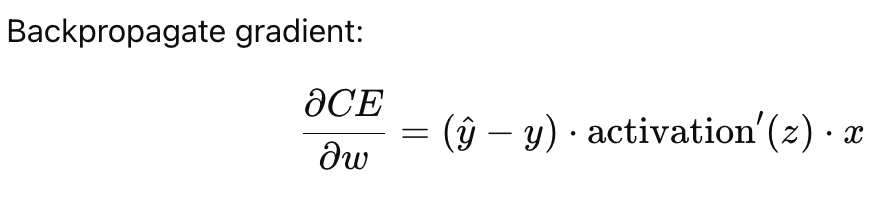
    - Formula:
      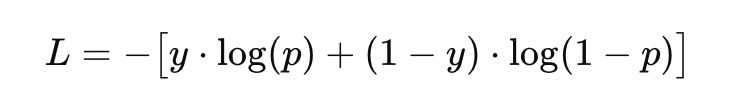
        
2. **Categorical Cross-Entropy**
    - For **multi-class classification**.
    - Uses **softmax output**:
     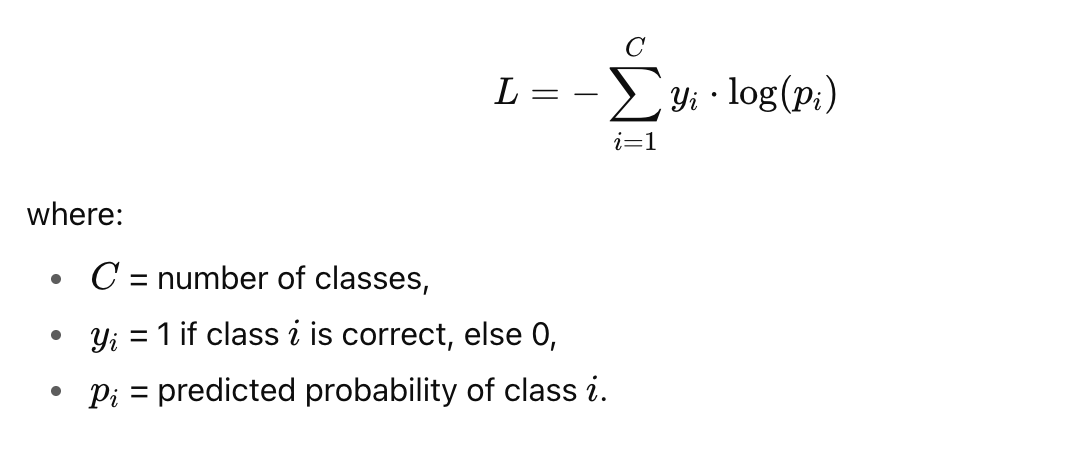
        
3. **Hinge Loss**
    - For **SVM-style classification** (max-margin).
    - Penalizes predictions inside the margin.

### **How it works**

- If the model assigns **high probability** to the correct class → loss is **low**.
- If it assigns **low probability** to the correct class → loss is **very high**.
- This makes the model **penalize wrong confident predictions more heavily**.

---

### **Why is it used?**

- Classification needs **probabilities**, not raw values. Cross-entropy naturally fits this requirement.
- Ensures predictions converge toward the correct class probability distribution.
- Works well with **softmax activation** (multi-class) and **sigmoid activation** (binary).

---

### B. **Regression Losses**

1. **Mean Squared Error (MSE)**
    - Penalizes **large deviations more heavily**.
      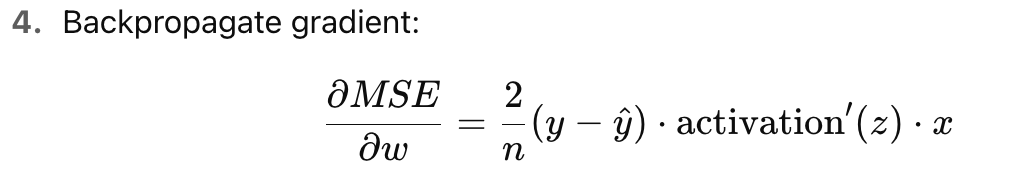
    - Formula:
      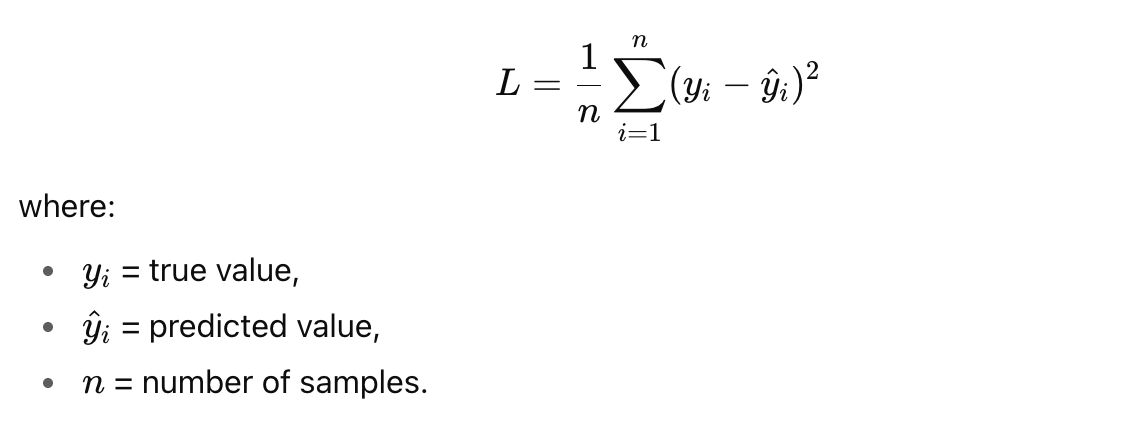

### 2. **How it works**

- If predictions are close to actual values → small squared error.
- If predictions are far → squared error increases significantly (large penalty).

---

### 3. **Why is it used?**

- Squaring ensures errors are **always positive**.
- Penalizes **large errors more heavily** → encourages models to minimize big mistakes.
- Provides smooth, continuous, differentiable loss → suitable for gradient descent.
        
2. **Mean Absolute Error (MAE)**
    - Penalizes **all errors linearly**.
    - Formula:
      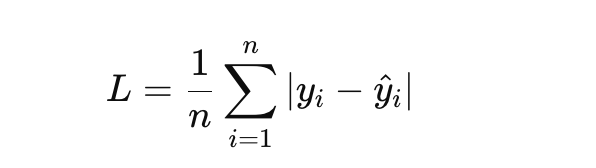
        
3. **Huber Loss**
    - Combines MSE & MAE: quadratic for small errors, linear for large errors.
    - Useful when **outliers exist**.

### If we use MAE (Mean Absolute Error) instead of MSE:

- MAE penalizes **all errors equally**, while MSE punishes large errors more → slower convergence.
- MSE is preferred when **outliers matter more**.

---

### ✅ **When to use MSE**

- Standard choice for **regression problems** (predicting continuous values).
- Works well when data has a **normal error distribution**.
- If data has many **outliers**, MAE may be better.
---
Choosing wrongly → Slow training, poor convergence, or nonsensical optimization.

## 3. **Role of Loss Functions in Model Optimization**

- **Guides Gradient Descent**: Loss = “compass” indicating direction to adjust weights.
- **Prevents underfitting/overfitting**: Correct loss choice ensures model learns patterns rather than noise.
- **Evaluates Performance**: Training loss vs validation loss shows **generalization ability**.
- **Steers Convergence**: Proper scaling & choice affect speed and stability of convergence.

---

## 4. **Time and Space Complexity**

Let nnn = number of samples, ddd = number of features, CCC = number of classes.

| Loss Type | Forward Pass | Backward Pass | Space Complexity | Remarks |
| --- | --- | --- | --- | --- |
| MSE | O(n) | O(n * d) | O(n) | Linear with samples |
| Cross-Entropy (binary) | O(n) | O(n) | O(n) | Linear with samples |
| Cross-Entropy (categorical) | O(n*C) | O(n*C) | O(n*C) | Scales with classes |
| Huber | O(n) | O(n) | O(n) | Smooth, robust to outliers |
- **Forward Pass:** Compute prediction → compute loss.
- **Backward Pass:** Compute derivative for each parameter.
- Space depends on storing predictions, true labels, gradients.

---

## 5. **Best Case / Worst Case Scenarios**

| Loss | Best Case | Worst Case | Remarks |
| --- | --- | --- | --- |
| Cross-Entropy | Correct class predicted with probability = 1 → loss = 0 | Incorrect class predicted with probability = 1 → loss → ∞ | Encourages high confidence in correct class |
| MSE | Predictions exactly match true values → loss = 0 | Predictions far from true values → loss grows quadratically | Sensitive to outliers; good for regression |
| MAE | Predictions exactly match true → loss = 0 | Far predictions → loss grows linearly | Less sensitive to outliers |

---

## 6. **Consequences of Wrong Choice of Loss**

- **Classification using MSE**:
    - Gradients vanish with sigmoid/softmax → slow learning.
    - Model struggles to separate classes.
- **Regression using Cross-Entropy**:
    - Doesn’t measure actual numerical distance → meaningless optimization.
- **Ignoring proper loss** → model fails to converge, overfits, or learns wrong patterns.

---

## 7. **Summary of Key Points**

1. **Loss function = feedback** to optimize model weights.
2. **Forward pass** → compute predicted output → compute loss → **Backward pass** → update weights.
3. **Classification → Cross-Entropy**, **Regression → MSE** (default).
4. **Types**: BCE, Categorical CE, Hinge, MSE, MAE, Huber.
5. **Role in optimization**: guides gradient descent, ensures convergence, prevents mislearning.
6. **Complexity**: linear with samples; categorical CE scales with classes.
7. **Wrong choice** → vanishing gradients, slow convergence, poor predictions.

## **Optimizers**

### **1️⃣ SGD (Stochastic Gradient Descent)**

**Concept:**

- Updates weights using the gradient of the loss function w.r.t. weights.
- “Stochastic” means it uses **one or a few samples** per iteration instead of the full dataset.

**Update rule:**

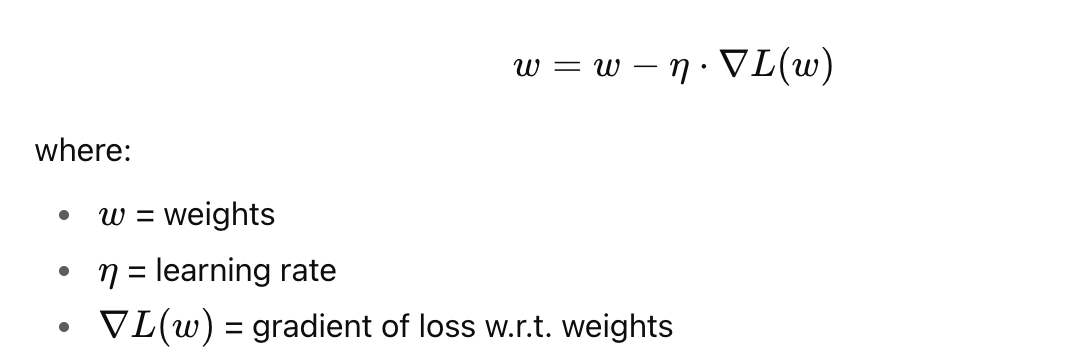

**Working Mechanism:**

1. Pick a random mini-batch of data.
2. Compute gradients for this mini-batch.
3. Update weights in the **opposite direction of gradient**.
4. Works for all layers in MLP.

**Advantages:**

- Simple and easy to implement.
- Works well for large datasets.

**Limitations:**

- Can be **slow** to converge.
- Can get stuck in **local minima** or **saddle points**.

**Best Use Case:**

- Basic models or small datasets where simplicity is preferred.

---

### **2️⃣ Momentum**

**Concept:**

- Adds **momentum** to the weight update to accelerate learning in the relevant direction.
- Helps overcome small local minima and smooths oscillations.

**Update rule:**

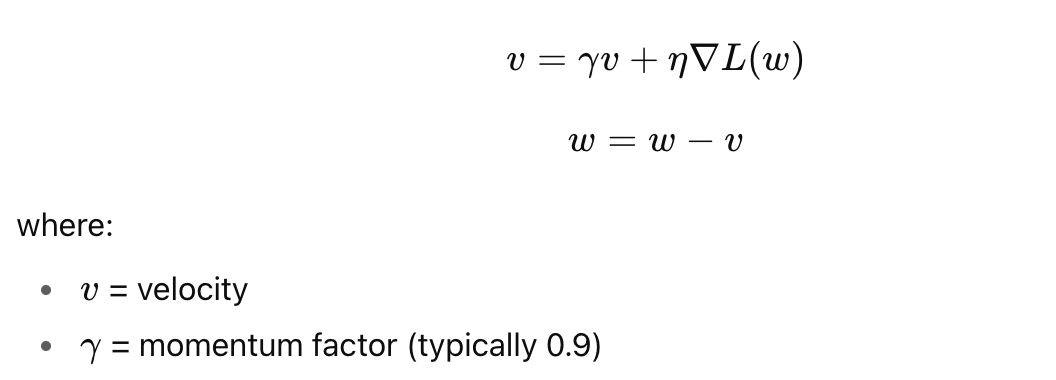

**Working Mechanism:**

1. Maintain a velocity vector that accumulates past gradients.
2. Update weights using this velocity instead of the raw gradient.
3. Helps MLP escape shallow minima and accelerate in valleys.

**Advantages:**

- Faster convergence than SGD.
- Reduces oscillations along steep directions.

**Limitations:**

- Needs tuning of **momentum factor (γ\gammaγ)**.

**Best Use Case:**

- Models with **ravines** in loss landscape (steep and narrow valleys).

---

### **3️⃣ Adam (Adaptive Moment Estimation)**

**Concept:**

- Combines **Momentum** and **RMSProp**.
- Adapts learning rate for each parameter individually.

**Update rule (simplified):**

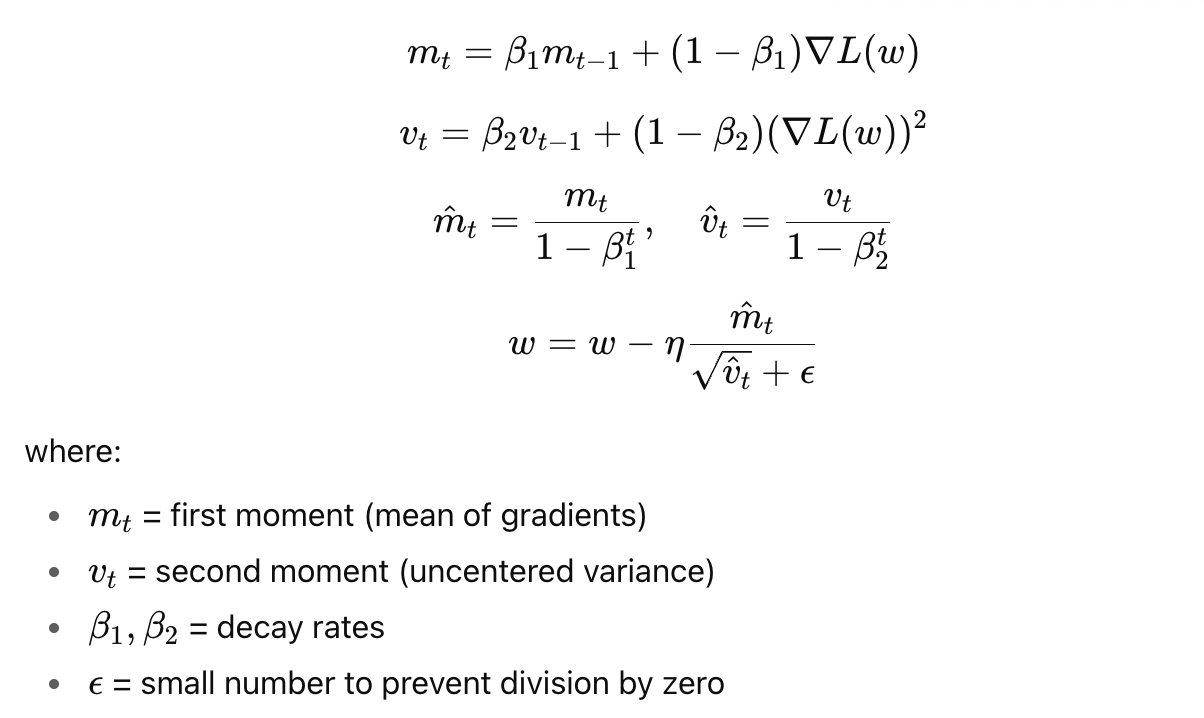

**Working Mechanism:**

1. Compute **moving averages of gradients** (momentum).
2. Compute **moving averages of squared gradients** (scales learning rate).
3. Correct bias and update weights adaptively.

**Advantages:**

- Fast convergence.
- Works well in practice for most deep learning tasks.
- Handles sparse gradients effectively.

**Limitations:**

- Can sometimes **overshoot** minima if learning rate is too high.
- More **memory-intensive** than SGD.

**Best Use Case:**

- Most modern **deep learning architectures** (CNNs, RNNs, Transformers).

---

### **Summary Table**

| Optimizer | Key Feature | Pros | Cons | Use Case |
| --- | --- | --- | --- | --- |
| **SGD** | Simple gradient descent | Easy, low memory | Slow, may oscillate | Small/simple datasets |
| **Momentum** | Adds velocity | Faster, smoother updates | Needs tuning of momentum | Deep networks, ravines |
| **Adam** | Adaptive learning rates | Fast, robust, works in most cases | Memory-heavy, may overshoot | Modern deep learning |
- SGD: simple but can be slow.
- Momentum: adds velocity.
- Adam: adaptive learning rate.

# SGD VS ADAM VS MOMENTUM

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize

# Function to build the model
def build_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Function to train and evaluate model
def train_and_evaluate(model, optimizer_name, optimizer):
    print(f"\n--- Training with {optimizer_name} optimizer ---")
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=5, validation_split=0.1, verbose=1)
    
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"Final Test Accuracy with {optimizer_name}: {test_acc:.4f}")
    print(f"Final Test Loss with {optimizer_name}: {test_loss:.4f}")
    return history

# Train and evaluate all three optimizers
model_sgd = build_model()
history_sgd = train_and_evaluate(model_sgd, "SGD", SGD(learning_rate=0.01))

model_momentum = build_model()
history_momentum = train_and_evaluate(model_momentum, "SGD with Momentum", SGD(learning_rate=0.01, momentum=0.9))

model_adam = build_model()
history_adam = train_and_evaluate(model_adam, "Adam", Adam(learning_rate=0.001))

print("\n--- Comparison complete! ---")
print("Check the final test accuracies above to see which optimizer performed best.")


--- Training with SGD optimizer ---
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 816us/step - accuracy: 0.8230 - loss: 0.6624 - val_accuracy: 0.9243 - val_loss: 0.2806
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - accuracy: 0.9142 - loss: 0.3033 - val_accuracy: 0.9412 - val_loss: 0.2152
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - accuracy: 0.9293 - loss: 0.2472 - val_accuracy: 0.9495 - val_loss: 0.1812
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 711us/step - accuracy: 0.9394 - loss: 0.2116 - val_accuracy: 0.9518 - val_loss: 0.1656
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - accuracy: 0.9470 - loss: 0.1853 - val_accuracy: 0.9608 - val_loss: 0.1465
Final Test Accuracy with SGD: 0.9484
Final Test Loss with SGD: 0.1762

--- Training with SGD with Momentum optimizer ---
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 775us/step - accuracy: 0.9056 - loss: 0.3128 - val_accuracy: 0.9653 - val_loss: 0.1212
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 708us/step -

### **short explanation** of the code:

1. **Imports**: TensorFlow/Keras for modeling, MNIST dataset, and Matplotlib for plotting.
2. **Load & normalize data**: MNIST images scaled to 0–1.
3. **Build model**: Flatten → Dense(128, ReLU) → Dense(64, ReLU) → Dense(10, softmax).
4. **train_and_evaluate()**: Compiles, trains (5 epochs), evaluates on test set, prints test accuracy/loss, returns training history.
5. **Train 3 optimizers**:
    - SGD (basic)
    - SGD + Momentum
    - Adam (adaptive)
6. **Print final comparison**: Shows which optimizer performed best.

It’s essentially a **comparison of three optimizers** on the MNIST dataset with a simple feedforward network.

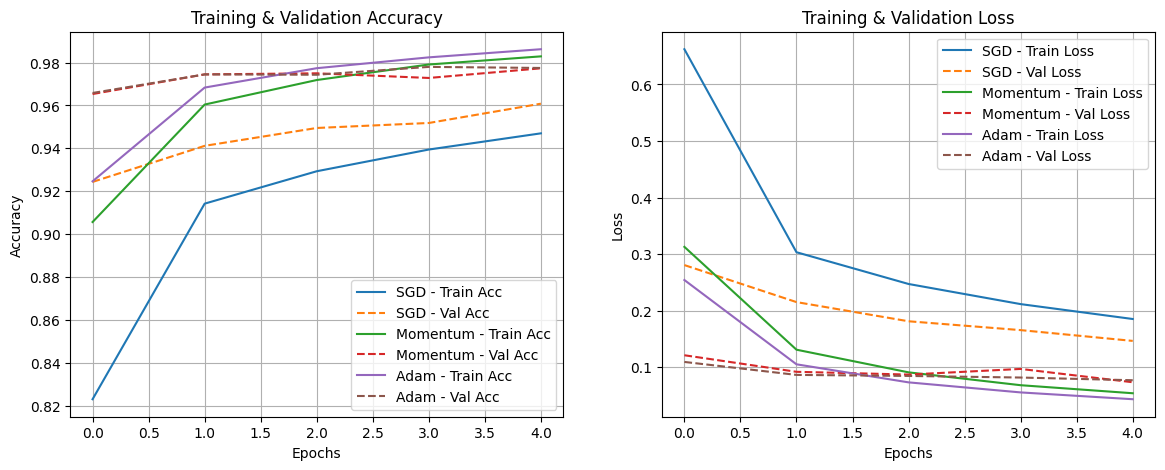

In [20]:
# ---------------------------
# Plot Training & Validation Accuracy and Loss
# ---------------------------

plt.figure(figsize=(14,5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_sgd.history['accuracy'], label='SGD - Train Acc')
plt.plot(history_sgd.history['val_accuracy'], label='SGD - Val Acc', linestyle='--')
plt.plot(history_momentum.history['accuracy'], label='Momentum - Train Acc')
plt.plot(history_momentum.history['val_accuracy'], label='Momentum - Val Acc', linestyle='--')
plt.plot(history_adam.history['accuracy'], label='Adam - Train Acc')
plt.plot(history_adam.history['val_accuracy'], label='Adam - Val Acc', linestyle='--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_sgd.history['loss'], label='SGD - Train Loss')
plt.plot(history_sgd.history['val_loss'], label='SGD - Val Loss', linestyle='--')
plt.plot(history_momentum.history['loss'], label='Momentum - Train Loss')
plt.plot(history_momentum.history['val_loss'], label='Momentum - Val Loss', linestyle='--')
plt.plot(history_adam.history['loss'], label='Adam - Train Loss')
plt.plot(history_adam.history['val_loss'], label='Adam - Val Loss', linestyle='--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

Here’s a **short explanation** of the plotting code:

1. **Create Figure**: `plt.figure(figsize=(14,5))` → Large figure to hold two subplots side by side.
2. **Accuracy Plot** (`plt.subplot(1, 2, 1)`):
    - Plots **training accuracy** (solid lines) and **validation accuracy** (dashed lines) for **SGD, Momentum, and Adam**.
    - Labels, title, and grid added for clarity.
3. **Loss Plot** (`plt.subplot(1, 2, 2)`):
    - Plots **training loss** (solid lines) and **validation loss** (dashed lines) for the three optimizers.
    - Labels, title, and grid added.
4. **`plt.show()`**: Displays the plots.

✅ **Purpose**: Compare **training speed, convergence, and stability** of SGD, Momentum, and Adam visually for both **accuracy** and **loss**.

# Plot loss vs epoch

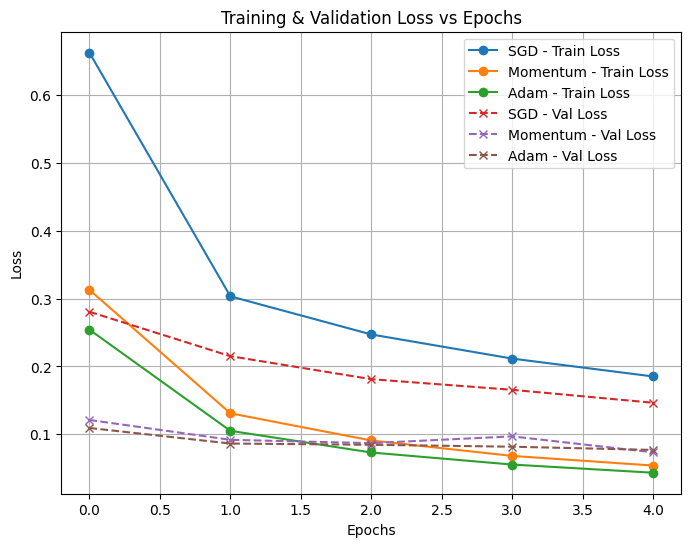

In [21]:
import matplotlib.pyplot as plt

# Plot Training & Validation Loss
plt.figure(figsize=(8,6))

# Training Loss
plt.plot(history_sgd.history['loss'], label='SGD - Train Loss', marker='o')
plt.plot(history_momentum.history['loss'], label='Momentum - Train Loss', marker='o')
plt.plot(history_adam.history['loss'], label='Adam - Train Loss', marker='o')

# Validation Loss
plt.plot(history_sgd.history['val_loss'], label='SGD - Val Loss', linestyle='--', marker='x')
plt.plot(history_momentum.history['val_loss'], label='Momentum - Val Loss', linestyle='--', marker='x')
plt.plot(history_adam.history['val_loss'], label='Adam - Val Loss', linestyle='--', marker='x')

plt.title('Training & Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

**Short explanation:**

- Creates a figure to plot **Loss vs Epochs** for SGD, Momentum, and Adam.
- **Solid lines with circles**: training loss.
- **Dashed lines with X markers**: validation loss.
- Adds **title, axis labels, legend, and grid** for clarity.
- `plt.show()` displays the plot.

✅ **Purpose:** Compare **training speed, convergence, and stability** of the three optimizers visually.

# **Initialization**

## 🧠 Xavier Initialization

**Xavier Initialization**, also known as **Glorot Initialization**, is a technique used to initialize the weights of neural networks to address the challenges of vanishing and exploding gradients, which can hinder the training of deep neural networks.

---

### 📚 Understanding Xavier Initialization

Introduced by Xavier Glorot and Yoshua Bengio in their 2010 paper titled "Understanding the Challenges of Training Deep Feedforward Neural Networks," this method aims to maintain the variance of activations and gradients throughout the layers of a neural network. This is particularly important when using activation functions like the hyperbolic tangent (tanh) and logistic sigmoid, which are symmetric around zero and can suffer from vanishing gradients if not initialized properly.

The key idea is to ensure that:

- The variance of activations remains consistent across layers.
- The variance of gradients during backpropagation is also consistent.

This helps in preventing the vanishing or exploding gradient problem, leading to more stable and efficient training.

### 📐 Mathematical Foundation

### **Uniform Xavier Initialization**

Weights are initialized by drawing them from a random uniform distribution within a specific range determined by the formula:

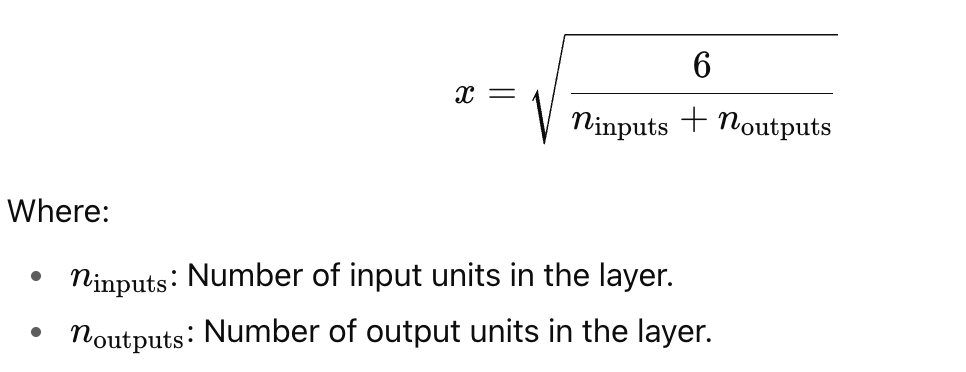

### **Normal Xavier Initialization**

Alternatively, weights can be initialized by drawing them from a normal (Gaussian) distribution with a mean of 0 and a standard deviation determined by:

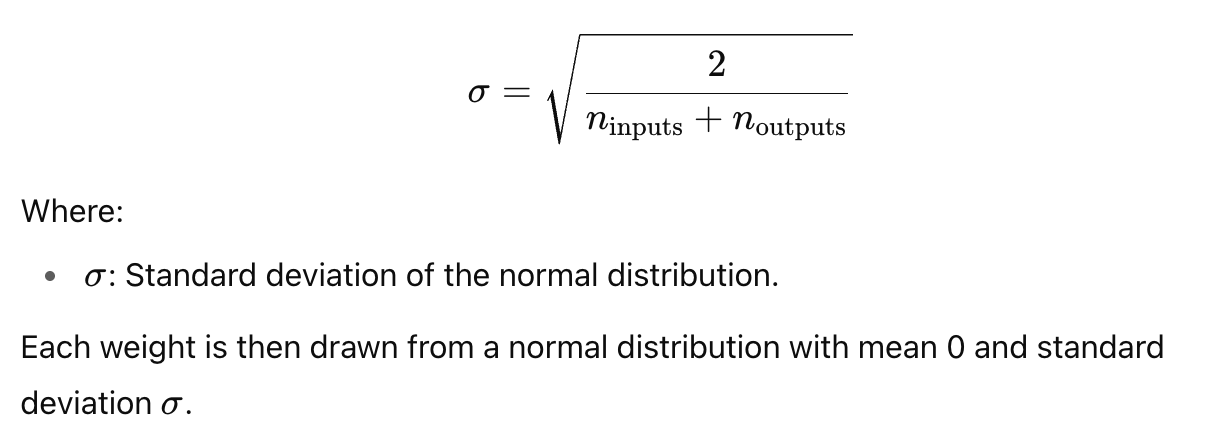

### ⚙️ Why Xavier Initialization Matters

Proper initialization is crucial because:

- **Vanishing Gradients**: Without proper initialization, gradients can become exceedingly small, slowing down or halting learning.
- **Exploding Gradients**: Conversely, gradients can become excessively large, causing numerical instability.

Xavier Initialization addresses these issues by:

- Ensuring that the variance of activations and gradients remains consistent across layers.
- Facilitating faster convergence during training.
- Enabling deeper networks to train effectively without gradient-related issues.

---

### Importance of Weight Initialization

Before discussing Xavier’s initialization, let’s consider the significance of initialization in deep learning.

1. Vanishing and Exploding Gradients:

- Vanishing gradients occur when gradients become extremely small during training, causing slow or no learning, especially in deep networks.
- Exploding gradients happen when gradients become extremely large, leading to unstable and ineffective training, often causing divergence.

Both issues hinder successful deep learning training.

2. Problem of Overfitting:

- Neural networks, especially deep ones, have high capacity to learn complex patterns.
- However, this capacity also makes them prone to overfitting.
- Weight initialization indirectly helps tackle overfitting by ensuring well-scaled weights that prevent vanishing gradients and neuron saturation.

3. Saturation:

- Saturation occurs when an activation function’s output becomes extremely close to its minimum or maximum value for a wide range of inputs.
- This makes the activation function insensitive to input changes and its gradient approach zero.
- Proper initializing weights helps keep activations in a balanced range, preventing saturation and associated gradient problems.

### 🧪 When to Use Xavier Initialization

Xavier Initialization is most beneficial when:

- Using activation functions like **tanh** or **sigmoid**, which are sensitive to the scale of input data.
- Building deep feedforward neural networks where maintaining gradient stability is crucial.

---

### 🔍 Visualizing the Impact

To understand the effect of Xavier Initialization, consider the following visualizations:

- **Without Proper Initialization**: Activations may vanish or explode as they propagate through layers.
- **With Xavier Initialization**: Activations maintain a consistent variance, leading to stable gradients and effective learning.

---

### ✅ Summary

- **Xavier Initialization** is a weight initialization technique that ensures the variance of activations and gradients remains consistent across layers.
- It is particularly effective for activation functions like **tanh** and **sigmoid**.
- Proper initialization facilitates stable training, faster convergence, and enables the effective training of deep neural networks.

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))

model.add(layers.Dense(128, kernel_initializer='glorot_uniform', activation='relu'))
model.add(layers.Dense(64, kernel_initializer='glorot_uniform', activation='relu'))

model.add(layers.Dense(
    10, kernel_initializer='glorot_uniform', activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc * 100:.2f}%')

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9292 - loss: 0.2416 - val_accuracy: 0.9552 - val_loss: 0.1419
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 986us/step - accuracy: 0.9688 - loss: 0.1027 - val_accuracy: 0.9685 - val_loss: 0.0999
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 980us/step - accuracy: 0.9784 - loss: 0.0711 - val_accuracy: 0.9720 - val_loss: 0.0946
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9826 - loss: 0.0544 - val_accuracy: 0.9750 - val_loss: 0.0850
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 984us/step - accuracy: 0.9858 - loss: 0.0431 - val_accuracy: 0.9755 - val_loss: 0.0848
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9891 - loss: 0.0340 - val_accuracy: 0.9764 - val_loss: 0.0819
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9907 - loss: 0.0285 - val_accuracy: 0.9772 - val_loss: 0.0878
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9918 - loss: 0.0

**Short explanation:**

- Loads and normalizes MNIST dataset.
- Builds a **feedforward network**: Flatten → Dense(128, ReLU) → Dense(64, ReLU) → Dense(10, softmax).
- Uses **Glorot/Xavier initialization** for weights.
- Compiles with **Adam optimizer** and **sparse categorical crossentropy loss**.
- Trains for 10 epochs with validation on test set.
- Evaluates and prints **test accuracy**.

## 🧠 He/Kaiming Initialization

**Kaiming Initialization** is a weight initialization technique introduced by Kaiming He and his collaborators in the paper "Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification."

This method is designed to address the challenges of vanishing and exploding gradients that can occur during the training of deep neural networks, particularly those utilizing **ReLU (Rectified Linear Unit)** activation functions.

---

## 🔍 Motivation

In deep networks, especially those using ReLU activations, traditional weight initialization methods like random normal or Xavier initialization may lead to gradients that vanish or explode as they are propagated through the layers during backpropagation. Kaiming Initialization aims to mitigate these issues by adjusting the initial weights to facilitate efficient training.

---

## 📐 Mathematical Foundation

Kaiming Initialization is calculated as a random number drawn from a Gaussian (normal) distribution with:
 
- **Mean (μ)**: 0.0    
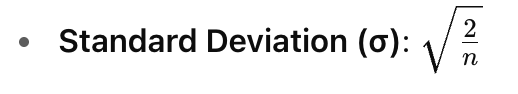

Where:

- n is the number of inputs to the node.

This initialization method ensures that the variance of the activations is maintained across layers, preventing the gradients from vanishing or exploding.

---

## ⚙️ Derivation of Kaiming Initialization

To derive Kaiming Initialization, consider the following assumptions:

- The output of a neural network at any layer is given by:y=Wx+b
    
  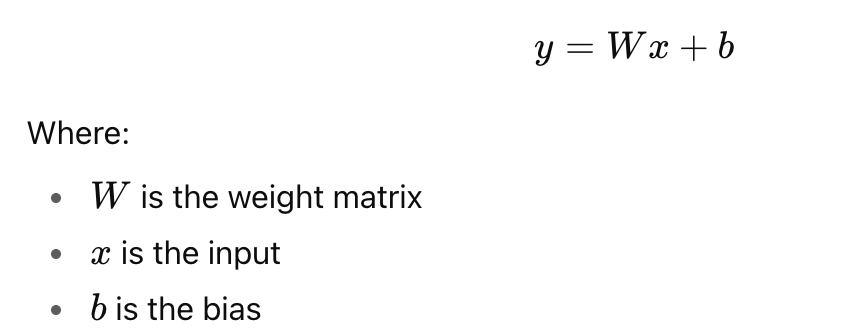
- All elements in W share the same distribution and are independent of each other.
- All elements in x are mutually independent and share the same distribution.
- We assume the weight in each layer has zero mean.
- Weights and inputs are independent of each other.
- Biases are initialized to zero or small constant values separately from the weights.

By applying these assumptions and using properties of variance, Kaiming Initialization is derived to maintain the variance of activations and gradients across layers.

---

## 📈 Why Kaiming Initialization Matters

Proper initialization is crucial because:

- **Vanishing Gradients**: Without proper initialization, gradients can become exceedingly small, slowing down or halting learning.
- **Exploding Gradients**: Conversely, gradients can become excessively large, causing numerical instability.

Kaiming Initialization addresses these issues by:

- Ensuring that the variance of activations and gradients remains consistent across layers.
- Facilitating faster convergence during training.
- Enabling deeper networks to train effectively without gradient-related issues.

---

## 🧪 When to Use Kaiming Initialization

Kaiming Initialization is particularly beneficial when:

- Using **ReLU** or **Leaky ReLU** activation functions, which are sensitive to the scale of input data.
- Building deep neural networks where maintaining gradient stability is crucial.

## 📐 Uniform Kaiming Initialization

In **Uniform Kaiming Initialization**, weights are initialized by drawing values from a uniform distribution within a specific range. The range is determined by the number of input units to the neuron, ensuring that the variance of activations remains consistent across layers.

### Key Points:

- **Uniform Distribution**: Weights are drawn from a uniform distribution within the calculated range.
- **ReLU Activation**: Optimized for networks using ReLU or Leaky ReLU activations.
- **Prevents Gradient Issues**: Helps in mitigating vanishing and exploding gradient problems.

---

## 📈 Normal Kaiming Initialization

In **Normal Kaiming Initialization**, weights are initialized by drawing values from a normal (Gaussian) distribution with a mean of 0 and a standard deviation determined by the number of input units to the neuron.

### Key Points:

- **Normal Distribution**: Weights are drawn from a normal distribution with the calculated standard deviation.
- **ReLU Activation**: Suitable for networks using ReLU or Leaky ReLU activations.
- **Gradient Stability**: Aims to maintain gradient stability during training.

---

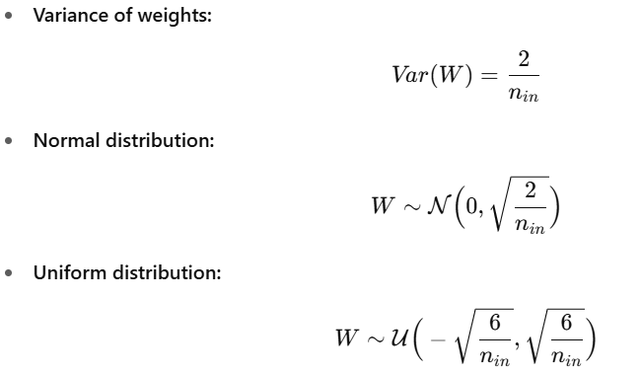

## ✅ Summary

- **Kaiming Initialization** is a weight initialization technique that ensures the variance of activations and gradients remains consistent across layers.
- It is particularly effective for activation functions like **ReLU** and **Leaky ReLU**.
- Proper initialization facilitates stable training, faster convergence, and enables the effective training of deep neural networks.

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.initializers import HeNormal

# Build a simple feedforward neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),  # For MNIST dataset
    Dense(128, activation='relu', kernel_initializer=HeNormal()),
    Dense(64, activation='relu', kernel_initializer=HeNormal()),
    Dense(10, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

**Short explanation:**

- Imports TensorFlow/Keras and **HeNormal initializer**.
- Builds a **feedforward neural network**:
    - Flatten → Dense(128, ReLU, He initialization) → Dense(64, ReLU, He initialization) → Dense(10, softmax).
- **HeNormal** initializes weights to prevent vanishing/exploding gradients, ideal for ReLU.
- Compiles with **Adam optimizer** and **sparse categorical crossentropy loss**.
- `model.summary()` prints the **architecture, layers, output shapes, and total parameters**.

### **Batch vs Mini-batch vs Online training.**

## **1. Batch Gradient Descent (Full Batch)**

### **Definition:**

- In **batch gradient descent**, the model is updated **after computing the gradients for the entire training dataset**.
- The **loss function** is calculated using all training examples before performing **weight updates**.

### **How it works:**

1. Forward pass through all training data → compute predictions.
2. Compute loss over all examples.
3. Compute gradients of loss w.r.t all parameters.
4. Update model weights **once per epoch** using the average gradient.

### **Pros:**

- Deterministic: weight updates are stable and consistent.
- Converges smoothly because gradient is accurate.

### **Cons:**

- Computationally expensive for **large datasets**.
- Memory intensive: need to store all data for gradient computation.
- Slow updates: model cannot learn incrementally.

### **Use Cases:**

- Small datasets that fit in memory.
- Scenarios where **stable convergence** is preferred.

---

## **2. Mini-batch Gradient Descent**

### **Definition:**

- In **mini-batch gradient descent**, the training set is divided into **small batches** (e.g., 32, 64, 128 samples).
- The model is updated **after each mini-batch**, not the entire dataset.

### **How it works:**

1. Split dataset into mini-batches of size `m`.
2. For each mini-batch:
    - Forward pass → compute predictions.
    - Compute loss and gradients for the mini-batch.
    - Update model weights.
3. Repeat for all mini-batches → one epoch.

### **Pros:**

- Efficient: fits in memory and leverages **vectorized computation**.
- Faster convergence than batch gradient descent.
- Introduces some noise in updates → can escape local minima.
- **Widely used in deep learning**.

### **Cons:**

- Gradient is an **approximation**, so weight updates are noisy.
- Choosing optimal batch size is critical: too small → unstable, too large → slow convergence.

### **Use Cases:**

- Large datasets where full batch is impractical.
- Most modern deep learning frameworks default to **mini-batch** training.

---

## **3. Online / Stochastic Gradient Descent (SGD)**

### **Definition:**

- In **online or stochastic gradient descent**, the model is updated **after each training example**.

### **How it works:**

1. Take **one training sample** at a time.
2. Compute loss and gradient for that single sample.
3. Update weights immediately.
4. Repeat for all samples → one epoch.

### **Pros:**

- Can **learn online** as data comes in.
- Fast updates → suitable for real-time systems.
- Can escape shallow local minima due to noisy updates.

### **Cons:**

- Highly noisy gradient → unstable convergence.
- Requires careful tuning of learning rate.
- Not efficient on vectorized hardware (e.g., GPUs) compared to mini-batch.

### **Use Cases:**

- Streaming data / online learning scenarios.
- Very large datasets where **mini-batch is still too large**.

---

## **Comparison Table**

| Feature | Batch GD | Mini-batch GD | Online (SGD) |
| --- | --- | --- | --- |
| **Update Frequency** | Once per epoch | After each mini-batch | After each sample |
| **Memory Requirement** | High (full dataset) | Medium (mini-batch) | Low (single sample) |
| **Convergence** | Smooth, stable | Fast, slightly noisy | Very noisy |
| **Efficiency** | Low for large data | High | Medium |
| **Use Case** | Small datasets | Most deep learning | Online/streaming |
| **Noise in Updates** | Low | Medium | High |
| **Escape Local Minima** | Poor | Better | Best |

---

## **Key Points to Remember**

1. **Mini-batch is the most commonly used** in practice because it balances **stability and efficiency**.
2. **Batch GD** gives the true gradient but is slow for big datasets.
3. **SGD** can handle streaming data and may escape local minima but is noisy.
4. **Batch size choice** (for mini-batch) affects:
    - Training speed
    - Convergence stability
    - Memory usage
5. **Hardware considerations**: GPUs/TPUs prefer mini-batch for **vectorized operations**.

# **Math**

## **1. Forward Propagation (Forward Pass)**

Forward propagation is the process of computing the output of a neural network given an input. It is the first step during **training** and **inference**.

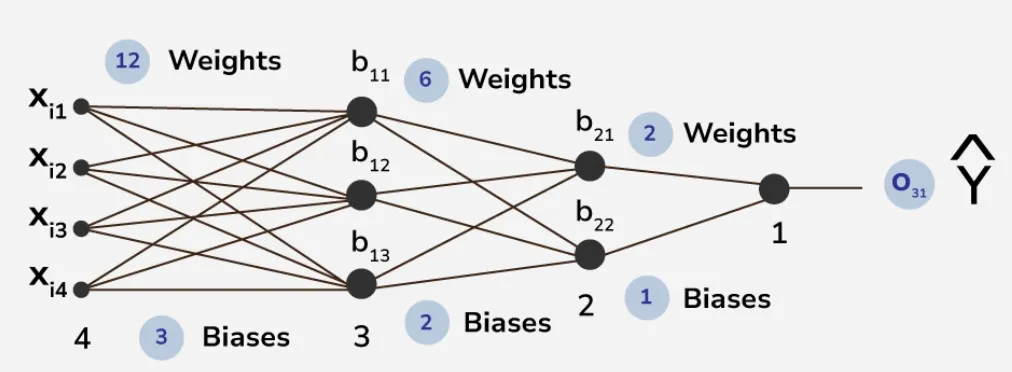

### **Step 1: Input Layer**

- Input vector:

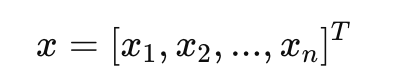

- Example: For MNIST, a 28×28 image → 784 features.
- **Purpose:** Feed the raw input data to the network.

---

### **Step 2: Linear Transformation (Weighted Sum) for Hidden Layer lll**

- Compute the weighted sum of inputs plus bias for each neuron:

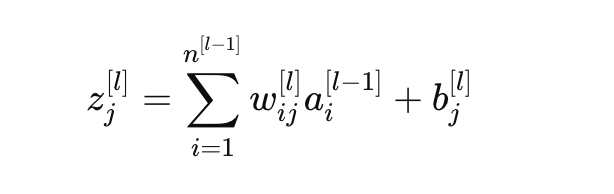

- Matrix form:

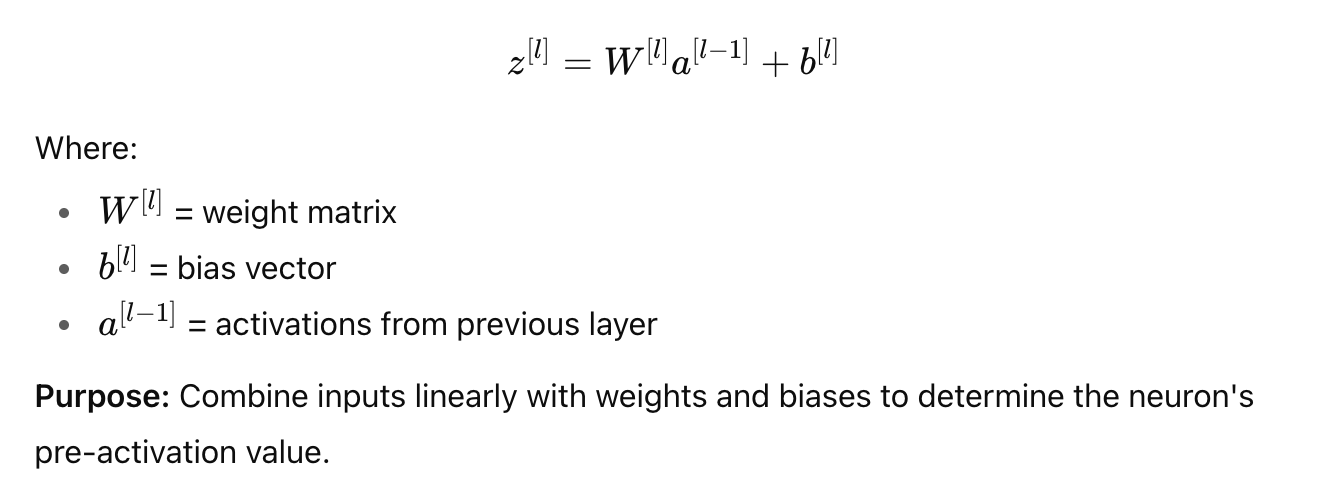

**Purpose:** Combine inputs linearly with weights and biases to determine the neuron's pre-activation value.

---

### **Step 3: Activation Function**

- Apply a non-linear activation function to introduce **non-linearity**:

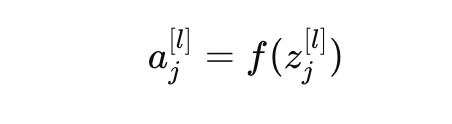

**Common Activations:**

- **ReLU:** f(x)=max⁡(0,x) ✅ Avoids vanishing gradient, fast, sparse activation
- **Sigmoid:** f(x)=$1/1+e^−x$ ✅ Output between 0–1, good for probabilities
- **Tanh:** f(x)=tanh⁡(x) ✅ Output between -1 to 1, zero-centered

**Purpose:** Allows network to model complex, non-linear relationships.

---

### **Step 4: Hidden Layers**

- Repeat linear transformation + activation for all hidden layers:

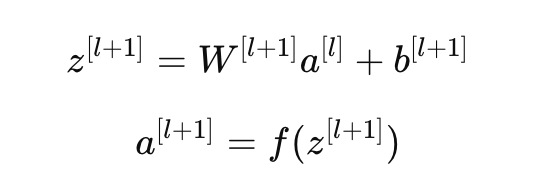

**Purpose:** Propagate features through layers to learn hierarchical representations.

---

### **Step 5: Output Layer (Softmax for Classification)**

- Compute weighted sum:

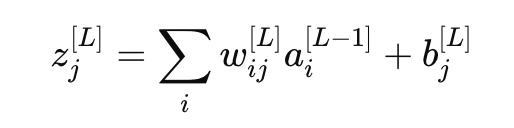

- Apply **Softmax** to get class probabilities:

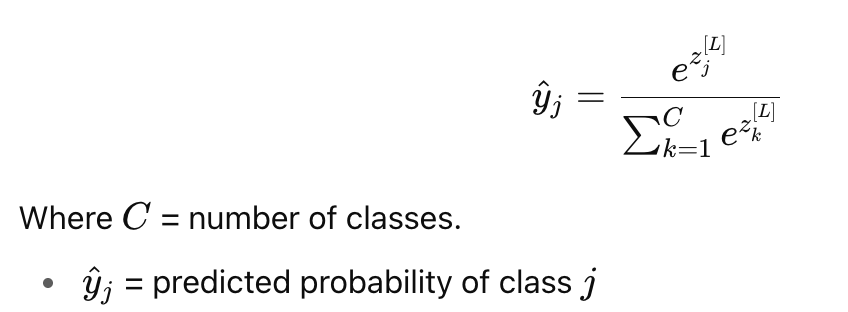

**Purpose:** Convert raw outputs (logits) into a probability distribution over classes.

---

## **2. Backpropagation (Training the Network)**

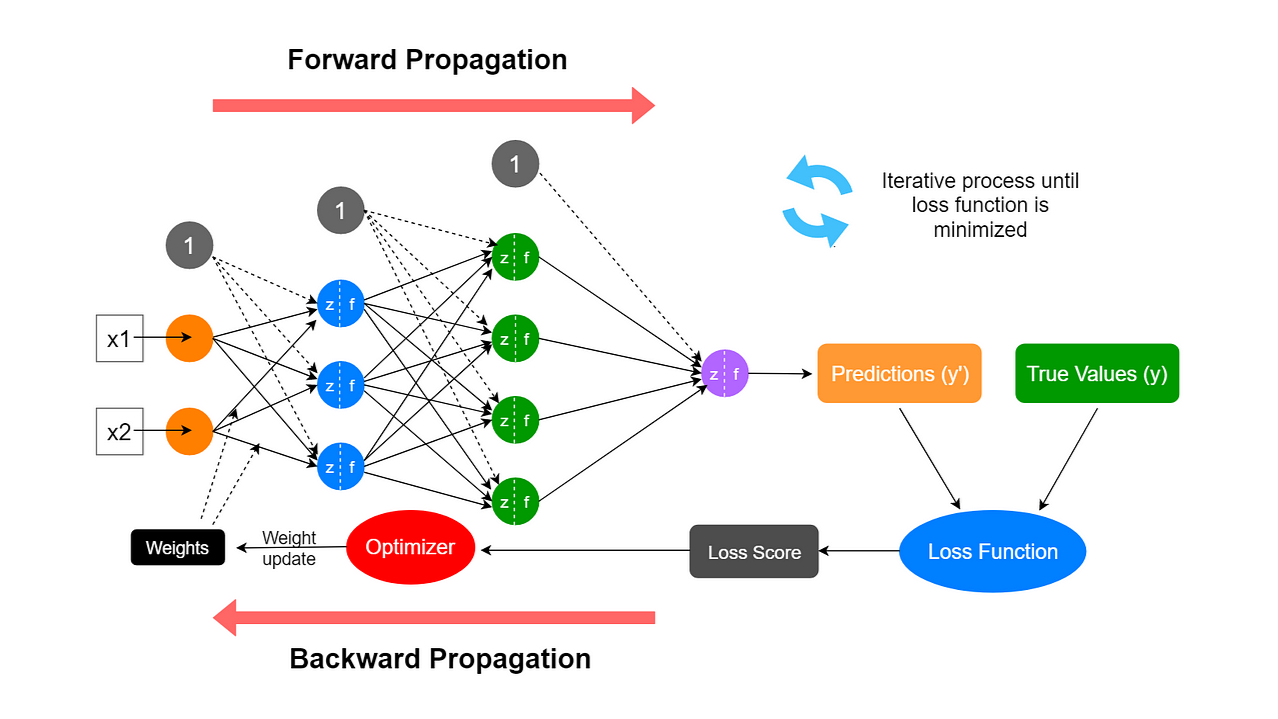
Backpropagation calculates **gradients** of the loss w.r.t. network parameters and updates weights to **minimize loss**.

### **Step 1: Compute Loss (Cross-Entropy for Classification)**

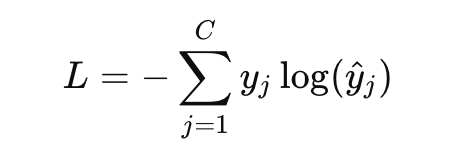

**Purpose:** Measure the difference between predicted probabilities (y^) and true labels (y).

---

### **Step 2: Compute Output Error**

- For **Softmax + Cross-Entropy**, derivative simplifies to:

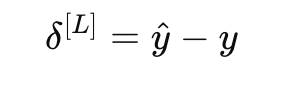

**Purpose:** Gives error at output layer for gradient computation.

---

### **Step 3: Propagate Error to Previous Layers**

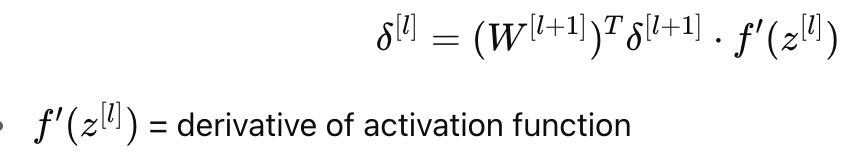
    
**Purpose:** Distribute error back through the network (chain rule).
    

---

### **Step 4: Compute Gradients**

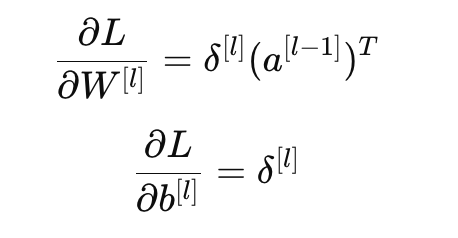

**Purpose:** Determine how weights and biases need to change to reduce loss.

---

### **Step 5: Update Weights using Optimizer**

- Example: **Stochastic Gradient Descent (SGD)**
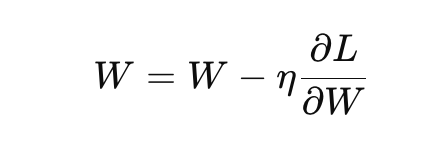

**Purpose:** Minimize loss by updating weights along negative gradient.

---

## **3. Cross-Entropy Loss with Softmax**

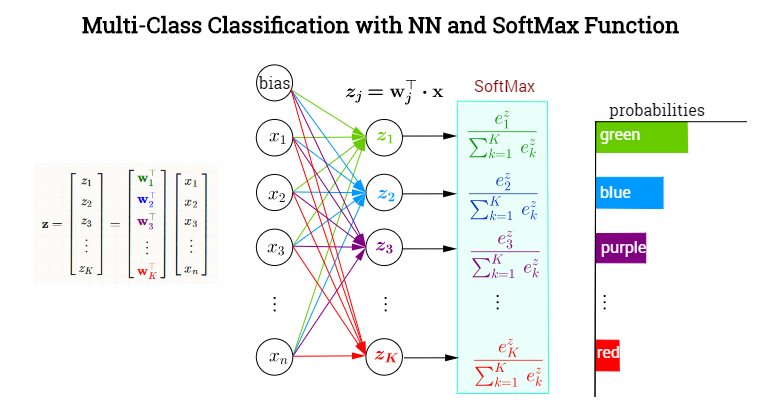

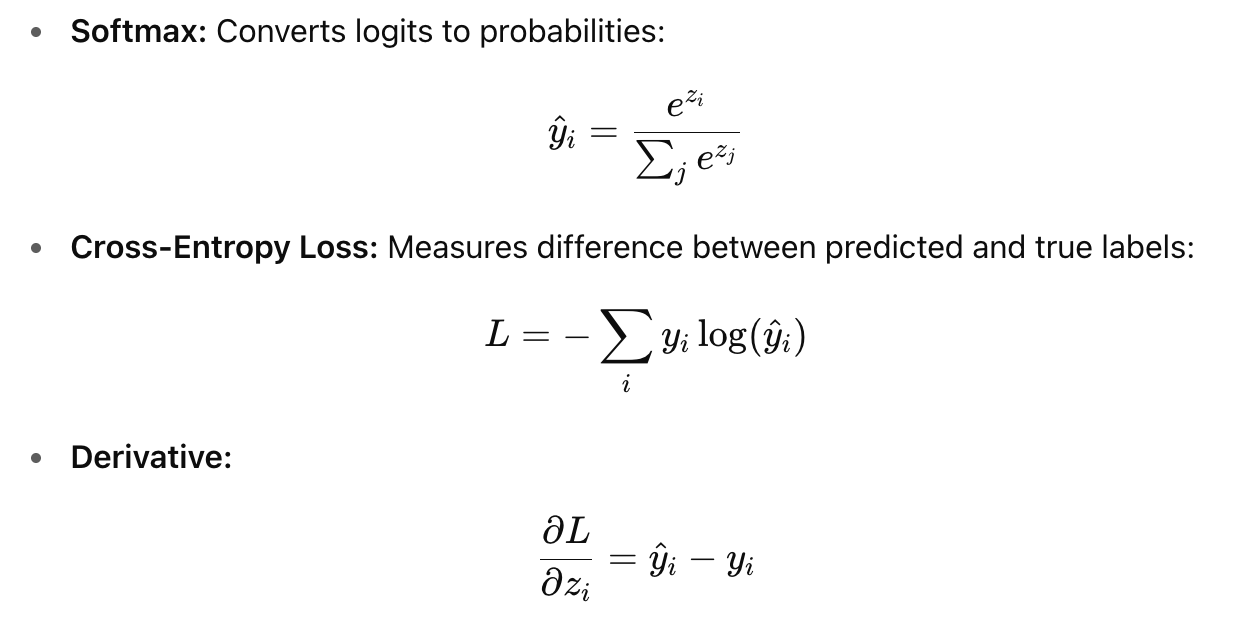

**Purpose:** Simplifies backpropagation and provides clear error signal.

---

## **4. Activation Functions: Why ReLU is Preferred**

f(x)=max(0,x)

**Advantages:**

- Avoids vanishing gradient (gradient = 1 for x>0)
- Computationally cheap
- Sparse activation → efficient
- Works well for deep networks

**Drawbacks:**

- Dying ReLU (neurons stuck at 0) → solved by **Leaky ReLU / Parametric ReLU**

---

## **5. Optimization Algorithms**

**(a) SGD (Stochastic Gradient Descent)**

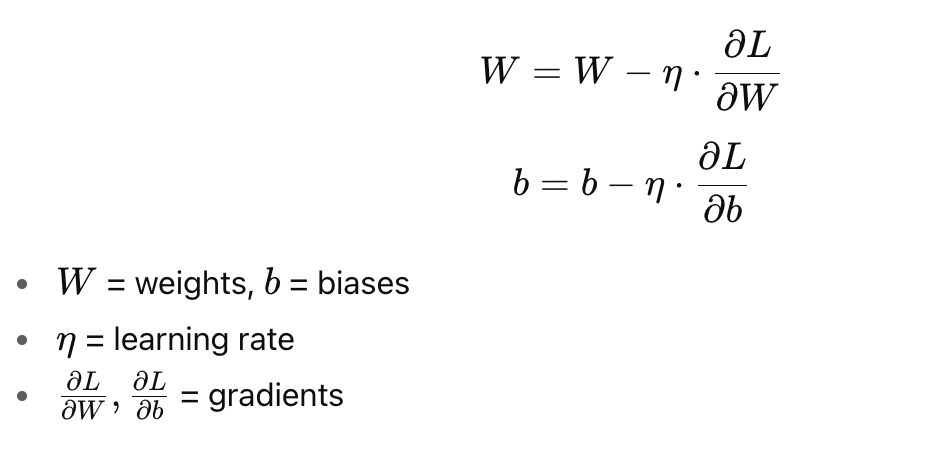

- Learning rate η controls step size.

**(b) SGD with Momentum**
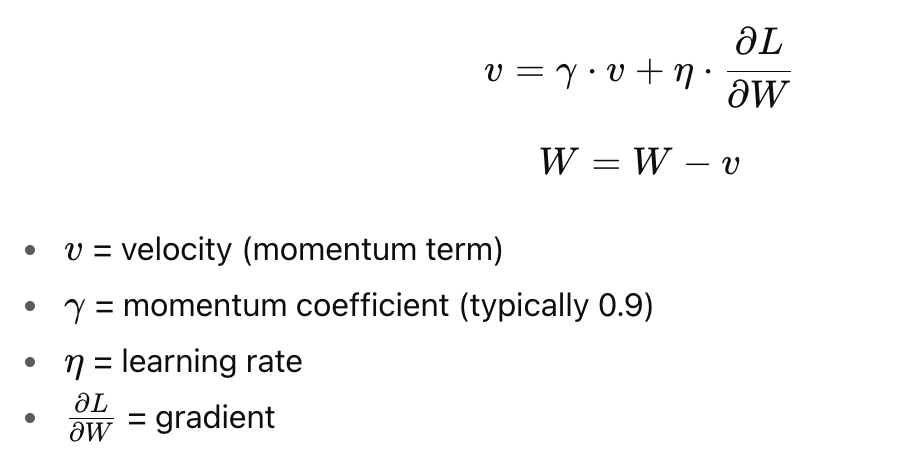

- Momentum (γ\gammaγ) smooths updates and avoids local minima.

**(c) Adam Optimizer**

- Maintains moving averages of gradients m_t and squared gradients v_t
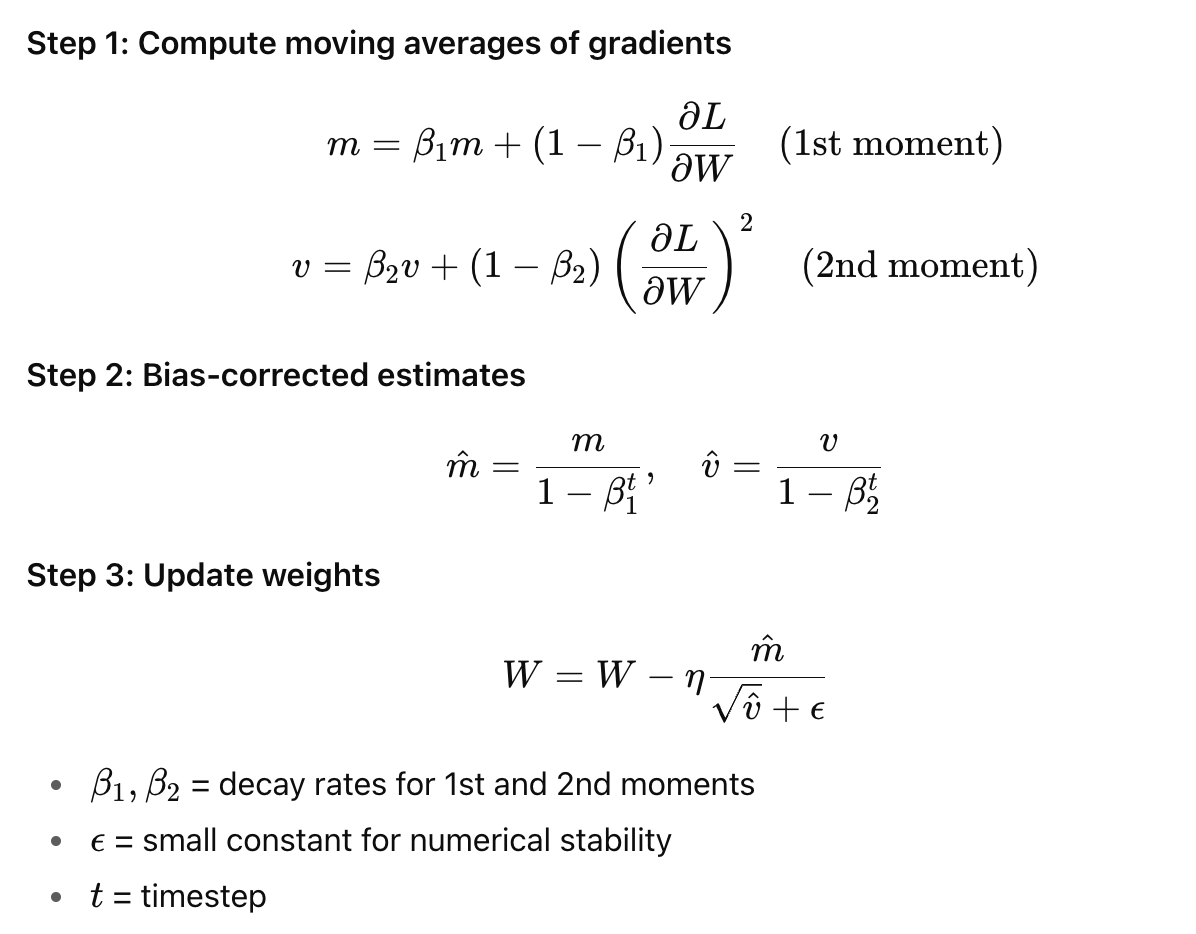

**Purpose:** Adaptive learning rate → faster convergence → widely used in deep networks.

---

## **6. Summary Table of Forward Pass**

| Step | Equation | Purpose |
| --- | --- | --- |
| Input | 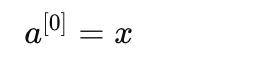 | Provide network with raw features |
| Linear | 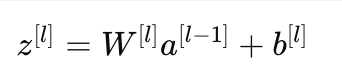 | Weighted sum + bias |
| Activation | 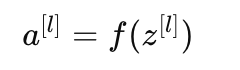 | Introduce non-linearity |
| Output (Softmax) | 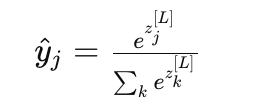 | Predict class probabilities |
| Loss | 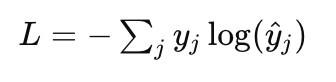 | Measure prediction error |
